In [81]:
import pandas as pd
df = pd.read_csv('BankChurners.csv')

df.shape

(10127, 23)

In [2]:
df.head(3)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Inactive_12_mon_1,Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998


In [82]:
df.drop('CLIENTNUM', axis=1 , inplace = True)
print(df.shape)

(10127, 22)


In [4]:
category =  df.columns[(df.dtypes == 'object')]
print(category)
cont =  df.columns[(df.dtypes != 'object')]
print(cont)

Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],
      dtype='object')
Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Inactive_12_mon_1', 'Inactive_12_mon_2'],
      dtype='object')


In [52]:
X=df.drop(columns=['Inactive_12_mon_1', 'Inactive_12_mon_2'])
y=df['Attrition_Flag'].values

print(X.shape, y.shape)

(10127, 20) (10127,)


### Encoding

#### Category-Encoders
- Label Encoder
- One-Hot Encoder
- Sum Encoder
- Helmert Encoder
- Frequency Encoder
- Target Encoder
- M-Estimate Encoder
- Weight Of Evidence Encoder
- James-Stein Encoder
- Leave-one-out Encoder
- Catboost Encoder

![encoding](./encoding.JPG)

In [112]:
import pandas as pd

from category_encoders.ordinal import OrdinalEncoder
from category_encoders.woe import WOEEncoder
from category_encoders.target_encoder import TargetEncoder
from category_encoders.sum_coding import SumEncoder
from category_encoders.m_estimate import MEstimateEncoder
from category_encoders.leave_one_out import LeaveOneOutEncoder
from category_encoders.helmert import HelmertEncoder
from category_encoders.cat_boost import CatBoostEncoder
from category_encoders.james_stein import JamesSteinEncoder
from category_encoders.one_hot import OneHotEncoder
from category_encoders import BinaryEncoder

TEST = False

In [10]:
df.Education_Level.value_counts()

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [12]:
df.Gender.value_counts()

F    5358
M    4769
Name: Gender, dtype: int64

In [14]:
df2 = df[['Education_Level','Gender']]
print(df2.shape)

(10127, 2)


### 1.Label Encoding

So the range of numbers maps from 0 to n-1 as labels.

The disadvantage is that the labels are ordered randomly (in the existing order of the data), which can add noise while assigning an unexpected order between labels. In other words, the data becomes ordinary (ordinal, ordered) data, which can lead to unintended consequences.

skelearn 에서 제공하는 Lable Encoding, pandas에서 제공하는 factorize

In [22]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

df2['Education_Level'] = label.fit_transform(df2['Education_Level'])
df2['Gender'] = label.fit_transform(df2['Gender'])

#invers_transforn 다시 숫자 -> 문자 

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [23]:
df2.head()

,Education_Level,Gender
0,3,1
1,2,0
2,2,1
3,3,0
4,5,1


In [70]:
print(label.classes_)

['F' 'M']


In [28]:
df2.Education_Level.value_counts()

2    3128
3    2013
6    1519
5    1487
0    1013
4     516
1     451
Name: Education_Level, dtype: int64

### 2. Ordinal Encoding

순서형 범주형 변수에 적용
범주형 변수 중에서 순서뿐만 아니라 알파벳도 고려. 사용자가 판단하여 dict 형태로 변형

In [26]:
LE_encoder = OrdinalEncoder()
df_ordinal = LE_encoder.fit_transform(df)

In [27]:
df_ordinal.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Inactive_12_mon_1,Inactive_12_mon_2
0,1,45,1,3,1,1,1,1,39,5,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,1,49,2,5,2,2,2,1,44,6,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,1,51,1,3,2,1,3,1,36,4,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,1,40,2,4,1,3,2,1,34,3,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,1,40,1,3,3,1,1,1,21,5,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [29]:
df_ordinal.Education_Level.value_counts()

2    3128
1    2013
4    1519
3    1487
5    1013
6     516
7     451
Name: Education_Level, dtype: int64

In [ ]:
### Example
def stringtoint():
    income_data = df['Income_Category'].replace({'Unknown': 0 , 'Less than $40K':1, '$40K - $60K':2, 
                                                      '$80K - $120K':4, '$60K - $80K':3, '$120K +':5})
    updated_df['Income_Category'] = income_data

In [ ]:
### Example
dict = {'Very_short' : 1, 'Short' : 2}
df['ordinal'] = df.height.map(dict)

### 3. One-hot Encoding

If you have data with specific category values, you can create a column. If the base Label Encoder label type is N, then OHE is the way to create N columns.

Since only the row containing the content is given as 1, it is called one-hot encoding. Also called dummy encoding in the sense of creating a dummy.

category 컬럼이 너무 많으면 속도가 느려짐
get_dummies, sklearn에서 one-hot encoding 으로 제공됨

*분류 문제에서는 n개의 Category 모두 인코딩, 회귀 문제에서는 n-1개의 카테고리 인코딩. 자유도 (n-1)를 반영해주기 위함. 선형회귀에서는 모든 변수에 접근하게 된다. 학습하는 동안 모든 변수들을 동시에 접근

In [73]:
df2 = df[['Education_Level','Gender']]
print(df2.shape)

dummies = pd.get_dummies(df3, columns=df3.columns, drop_first=True, sparse=True, prefix_sep= '__')
### pre_fix = '컬럼명__'
### pd.get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)

#Whether the dummy-encoded columns should be backed by a SparseArray (True) or a regular NumPy array (False).
print(dummies.shape)

(10127, 2)
(10127, 7)


In [74]:
dummies.head()

,Education_Level__Doctorate,Education_Level__Graduate,Education_Level__High School,Education_Level__Post-Graduate,Education_Level__Uneducated,Education_Level__Unknown,Gender__M
0,0,0,1,0,0,0,1
1,0,1,0,0,0,0,0
2,0,1,0,0,0,0,1
3,0,0,1,0,0,0,0
4,0,0,0,0,1,0,1


In [ ]:
# %%time
# this method didn't work because of RAM memory. 
# so we have to use pd.dummies 
# OHE_encoder = OneHotEncoder(feature_list)
# train_ohe = OHE_encoder.fit_transform(train)
# test_ohe = OHE_encoder.transform(test)

### 4. Sum Encoder (Deviation Encoder, Effect Encoder)

Sum Encoder compares the mean of the dependent variable (target) for a given level of a categorical column to the overall mean of the target.
Sum Encoding is very similar to OHE and both of them are commonly used in Linear Regression (LR) types of models.
If you use Category-Encoders it will look like this code below.

*category_encoders.sum_coding.SumEncoder(verbose=0, cols=None, mapping=None, drop_invariant=False, return_df=True, handle_unknown='value', handle_missing='value')

### 5. Helmert Encoder
Helmert Encoding is a third commonly used type of categorical encoding for regression along with OHE and Sum Encoding.
It compares each level of a categorical variable to the mean of the **subsequent levels.

This type of encoding can be useful in certain situations where levels of the categorical variable are ordered.

특정한 level의 인코딩 값을 도출하기 위해 해당 level에 매핑되는 종속변수의 평균값, 모든 level에 매핑되는 모든 종속변수값들의 평균값을 비교하는 방법

In [ ]:
# %%time
# this method didn't work because of RAM memory. 
# HE_encoder = HelmertEncoder(feature_list)
# train_he = HE_encoder.fit_transform(train[feature_list], target)
# test_he = HE_encoder.transform(test[feature_list])

In [63]:
df4 = df[['Education_Level','Gender', 'Attrition_Flag']]
df4 ['Attrition'] = df4.Attrition_Flag.map({'Existing Customer':1, 'Attrited Customer':0})
print(df4.shape)

he_encoder = HelmertEncoder(cols = ['Education_Level'], drop_invariant = True)
dfh = he_encoder.fit_transform(df4['Education_Level'], 'Attrition')
dfh2 = pd.concat([df4, dfh ], axis = 1)
dfh2.head()

(10127, 4)


C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Education_Level,Gender,Attrition_Flag,Attrition,Education_Level_0,Education_Level_1,Education_Level_2,Education_Level_3,Education_Level_4,Education_Level_5
0,High School,M,Existing Customer,1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,Graduate,F,Existing Customer,1,1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,Graduate,M,Existing Customer,1,1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,High School,F,Existing Customer,1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,Uneducated,M,Existing Customer,1,0.0,2.0,-1.0,-1.0,-1.0,-1.0


### 6. Frequency Encoder
This method encodes by frequency.

Create a new feature with the number of categories from the training data.

I will not proceed separately in this data.

범주형 변수 값들의 빈도수에 기반해 인코딩하는 방식. 이 방법은 해당 범주형 변수의 빈도값이 종속변수와 연관이 있게 되면 모델이 가중치를 부여하도록 도와주게 된다

In [80]:
df6 = df[['Education_Level','Gender', 'Attrition_Flag']]
df6 ['Attrition'] = df7.Attrition_Flag.map({'Existing Customer':1, 'Attrited Customer':0})
print(df6.shape)

dftemp = df6.groupby("Gender").size()/len(df6)
df6['gender_freq'] = df['Gender'].map(dftemp)

df6.head()

(10127, 4)


C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Education_Level,Gender,Attrition_Flag,Attrition,gender_freq
0,High School,M,Existing Customer,1,0.470919
1,Graduate,F,Existing Customer,1,0.529081
2,Graduate,M,Existing Customer,1,0.470919
3,High School,F,Existing Customer,1,0.529081
4,Uneducated,M,Existing Customer,1,0.470919


### 7. Target Encoder (Mean Encoding)
To reduce the effect of target leakage,

Increase regularization
Add random noise to the representation of the category in train dataset (some sort of augmentation)
Use Double Validation (using other validation)
Let's use while being careful about overfitting.

범주형태의 독립변수들이 종속변수의 값들의 상관관계가 있음을 가정하다는 점에서 Label Encoding과 다르다. 범주형 변수를 Target의 평균으로 Labeling. 비슷한 범주형 사이에서 관련성을 도출하기는 하지만 그 관련성이 오로지 학습데이터에 범위에서만 존재. 그래서 과적합 문제가 있고, Cross validation 이나 정규화와 같은 조치가 필수적이다

In [77]:
df7 = df[['Education_Level','Gender', 'Attrition_Flag']]
df7 ['Attrition'] = df7.Attrition_Flag.map({'Existing Customer':1, 'Attrited Customer':0})
print(df7.shape)

TE_encoder = TargetEncoder()
train_te = TE_encoder.fit_transform(df7[['Education_Level','Gender']], df7['Attrition'])
#train_te = TE_encoder.fit_transform(df7[['Gender']], df7['Attrition'])

train_te.head()

(10127, 4)


C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Education_Level,Gender
0,0.847988,0.853848
1,0.844309,0.826428
2,0.844309,0.853848
3,0.847988,0.826428
4,0.840619,0.853848


### 8. M-Estimate Encoder

M-Estimate Encoder is a simplified version of Target Encoder. It has only one hyperparameter
x^k=n++prior∗my++m
The higher value of m results into stronger shrinking. Recommended values for m is in the range of 1 to 100.
If you use Category-Encoders it will look like this code below

    Mean encoding을 단순화 시킨 방법. 하나의 하이퍼파라미터 값이 m값이 존재하는데, 이 m값은 정규화의 강도를 의미한다. 따라서 m값을 높게 부여할수록 더 강력하게 정규화 시키면서 제한강도가 높아진다. 권장되는 m 값은 1~ 100 사이의 값이다. 

In [ ]:
%%time
#MEE_encoder = MEstimateEncoder()
# MEE_encoder = MEstimateEncoder(m=2)
#train_mee = MEE_encoder.fit_transform(train[feature_list], target)
#test_mee = MEE_encoder.transform(test[feature_list])

In [78]:
df8 = df[['Education_Level','Gender', 'Attrition_Flag']]
df8 ['Attrition'] = df8.Attrition_Flag.map({'Existing Customer':1, 'Attrited Customer':0})
print(df8.shape)

MEE_encoder = MEstimateEncoder(m=2)
train_te = MEE_encoder.fit_transform(df8[['Education_Level','Gender']], df8['Attrition'])

train_te.head()

(10127, 4)


C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Education_Level,Gender
0,0.847979,0.853842
1,0.844306,0.826433
2,0.844306,0.853842
3,0.847979,0.826433
4,0.840617,0.853842


In [79]:
df8 = df[['Education_Level','Gender', 'Attrition_Flag']]
df8 ['Attrition'] = df8.Attrition_Flag.map({'Existing Customer':1, 'Attrited Customer':0})
print(df8.shape)

MEE_encoder = MEstimateEncoder(m=10)
train_te = MEE_encoder.fit_transform(df8[['Education_Level','Gender']], df8['Attrition'])

train_te.head()

(10127, 4)


C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Education_Level,Gender
0,0.847945,0.853817
1,0.844294,0.826452
2,0.844294,0.853817
3,0.847945,0.826452
4,0.840610,0.853817


### 9. Weight of Evidence Encoder

Weight Of Evidence is a commonly used target-based encoder in credit scoring.

It is a measure of the “strength” of a grouping for separating good and bad risk (default).

It is calculated from the basic odds ratio:

    로지스틱 회귀분석에서 주로 사용. 하지만 정보 손실량이 많다는 점이 단점이다. 또한 일변량일때 주로 사용. 왜냐하면 WOE방법은 독립벼수들이 여러개일때, 독립벼수의 상관관계를 고려하지 않기 때문

In [ ]:
%%time
#WOE_encoder = WOEEncoder()
#train_woe = WOE_encoder.fit_transform(train[feature_list], target)
#test_woe = WOE_encoder.transform(test[feature_list])

In [69]:
import scorecardpy as scpy

### 10. Binary Encoding

In [114]:
df10 = df[['Education_Level','Gender', 'Attrition_Flag']]
df10 ['Attrition'] = df8.Attrition_Flag.map({'Existing Customer':1, 'Attrited Customer':0})
print(df10.shape)

be = BinaryEncoder (cols = ['Education_Level'])
be_df = be.fit_transform(df8['Education_Level'])

be_df.head()

(10127, 4)


,Education_Level_0,Education_Level_1,Education_Level_2,Education_Level_3
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,0,0,1
4,0,0,1,1


### ETC. 
- Binary Encoding
- Probablity Ratio Encoding
- Hashing
- Backward difference encoding
- Leave one out encoding
- James 
- stein encoding, 

more information -> https://towardsdatascience.com/how-to-encode-categorical-data-d44dde313131#0797

### Data encoding

In [83]:
updated_df = pd.DataFrame()

def tobinary():
    # full_df['Attrition_Flag'] = full_df.Attrition_Flag // same thing
    updated_df['Attrition'] = df.Attrition_Flag.map({'Existing Customer':1, 'Attrited Customer':0})
    updated_df['Gender'] = df.Gender.map({'M':1, 'F':0})

In [84]:
def stringtoint():
    income_data = df['Income_Category'].replace({'Unknown': 0 , 'Less than $40K':1, '$40K - $60K':2, 
                                                      '$80K - $120K':4, '$60K - $80K':3, '$120K +':5})
    
    education_data = df['Education_Level'].replace({'Unknown': 0, 'High School':2, 'Graduate':4, 'Uneducated':1,
                                                         'College':5,'Post-Graduate':3,'Doctorate':6})
    
    updated_df['Income_Category'] = income_data
    updated_df['Education_Level'] = education_data

In [85]:
def encode():
    global updated_df
    card_dummies = pd.get_dummies(df['Card_Category'], prefix='Card')
    marital_dummies = pd.get_dummies(df['Marital_Status'], prefix='Marital')
    updated_df = pd.concat([updated_df, marital_dummies, card_dummies], axis=1)

In [86]:
def concat_with_numerics():
    global updated_df
    updated_df = pd.concat([updated_df, df.loc[:, cont]], axis=1)

In [87]:
tobinary()
stringtoint()
encode()
concat_with_numerics()

In [88]:
print('Data shapes """including target value"""')
print(f'Old shape : {df.shape}')
print(f'Updated shape : {updated_df.shape}')

Data shapes """including target value"""
Old shape : (10127, 22)
Updated shape : (10127, 28)


In [89]:
updated_df.head()

,Attrition,Gender,Income_Category,Education_Level,Marital_Divorced,Marital_Married,Marital_Single,Marital_Unknown,Card_Blue,Card_Gold,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Inactive_12_mon_1,Inactive_12_mon_2
0,1,1,3,2,0,1,0,0,1,0,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,1,0,1,4,0,0,1,0,1,0,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,1,1,4,4,0,1,0,0,1,0,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,1,0,1,2,0,0,0,1,1,0,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,1,1,3,1,0,1,0,0,1,0,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [100]:
# Importing packages for modelling.

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate, learning_curve
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from collections import Counter
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTE
from numpy import where
from sklearn import metrics
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.tree import DecisionTreeClassifier
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [91]:
model_rf = RandomForestClassifier(criterion='gini', n_estimators=100, max_depth=4, random_state=101)

In [92]:
X=updated_df.drop(columns=['Attrition','Inactive_12_mon_1', 'Inactive_12_mon_2'])
y=updated_df['Attrition'].values

print(X.shape, y.shape)

(10127, 25) (10127,)


In [94]:
from sklearn.metrics import classification_report
def Models_NO(models, graph):
    
    model = models
    #X, y = Definedata()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 101)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    y_total = model.predict(X)
    
    if graph:
        train_matrix = pd.crosstab(y_train, model.predict(X_train), rownames=['Actual'], colnames=['Predicted'])    
        test_matrix = pd.crosstab(y_test, model.predict(X_test), rownames=['Actual'], colnames=['Predicted'])
        matrix = pd.crosstab(y, model.predict(X), rownames=['Actual'], colnames=['Predicted'])
    
        f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True, figsize=(15, 2))
    
        g1 = sns.heatmap(train_matrix, annot=True, fmt=".1f", cbar=False,annot_kws={"size": 18},ax=ax1)
        g1.set_title("{}/train set".format(model),fontsize=6)
        g1.set_ylabel('Total Churn = {}'.format(1- y_train.sum()), fontsize=14, rotation=90)
        g1.set_xlabel('Accuracy for TrainSet: {}'.format(accuracy_score(model.predict(X_train), y_train)))
        g1.set_xticklabels(['Churn','Not Churn'],fontsize=6)

        g2 = sns.heatmap(test_matrix, annot=True, fmt=".1f",cbar=False,annot_kws={"size": 18},ax=ax2)
        g2.set_title("{}/test set".format(model),fontsize=6)
        g2.set_ylabel('Total Churn = {}'.format(1- y_test.sum()), fontsize=14, rotation=90)
        g2.set_xlabel('Accuracy for TestSet: {}'.format(accuracy_score(y_pred, y_test)))
        g2.set_xticklabels(['Churn','Not Churn'],fontsize=6)

        g3 = sns.heatmap(matrix, annot=True, fmt=".1f",cbar=False,annot_kws={"size": 18},ax=ax3)
        g3.set_title("{}/total set".format(model),fontsize=6)
        g3.set_ylabel('Total Churn = {}'.format(1- y.sum()), fontsize=14, rotation=90)
        g3.set_xlabel('Accuracy for TotalSet: {}'.format(accuracy_score(y_total, y)))
        g3.set_xticklabels(['Churn','Not Churn'],fontsize=6)
    
        plt.show()
        print ("")
        print ("Classification Report: ")
        print (classification_report(y, y_total))
    else:
        print("\t\tError Table")
        print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, (y_pred)))
        print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, (y_pred) ))
        print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, (y_pred) )))
        print('Accuracy on Traing set   : ', model.score(X_train,y_train))
        print('Accuracy on Testing set  : ', model.score(X_test,y_test))
        print('AUC score                :', roc_auc_score(y, y_total)*100,'%')        
    return y_total, y

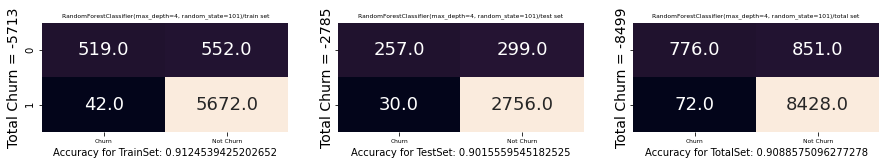


Classification Report: 
              precision    recall  f1-score   support

           0       0.92      0.48      0.63      1627
           1       0.91      0.99      0.95      8500

    accuracy                           0.91     10127
   macro avg       0.91      0.73      0.79     10127
weighted avg       0.91      0.91      0.90     10127



In [101]:
y_predict, y_test = Models_NO(model_rf, True)

### Classification Report

- sklearn.metrics.classification_report
- 실행문 : from sklearn.metrics import confusion_matrix, classification_report
- 사이킷런 패키지의 metrics 패키지에서는 정밀도, 재현율, F1점수를 구하는 classification_report 명령을 제공
- 이 명령은 각각의 클래스를 양성(positive) 클래스로 보았을 때의 정밀도, 재현율, F1점수를 각각 구하고 그 평균값으로 전체 모형의 성능을 평가

##### 지표 
- Precision (정밀도) : 정밀도(precision)은 양성 클래스에 속한다고 출력한 샘플 중 실제로 양성 클래스에 속하는 샘플 수의 비율을 말한다. 높을수록 좋은 모형이다. FDS의 경우, 사기 거래라고 판단한 거래 중 실제 사기 거래의 비율
- Recall (재현율) : 재현율(recall)은 실제 양성 클래스에 속한 표본 중에 양성 클래스에 속한다고 출력한 표본의 수의 비율을 뜻한다. 높을수록 좋은 모형이다. FDS의 경우 실제 사기 거래 중에서 실제 사기 거래라고 예측한 거래의 비율이 된다. TPR(true positive rate) 또는 민감도(sensitivity)
- F1 Score : 정밀도와 재현율의 가중조화평균(weight harmonic average)을 F점수(F-score)
-     Fβ=(1+β2)(precision×recall)/(β2precision+recall)
-     F1=2⋅precision⋅recall/(precision+recall)

- macro: 단순평균
- weighted: 각 클래스에 속하는 표본의 갯수로 가중평균
- accuracy: 정확도. 전체 학습데이터의 개수에서 각 클래스에서 자신의 클래스를 정확하게 맞춘 개수의 비율.

![classification_report](./classification_report.JPG)

In [104]:
#print(classification_reprot(y_true, y_test))
print(classification_report(y_test , y_predict))

              precision    recall  f1-score   support

           0       0.92      0.48      0.63      1627
           1       0.91      0.99      0.95      8500

    accuracy                           0.91     10127
   macro avg       0.91      0.73      0.79     10127
weighted avg       0.91      0.91      0.90     10127

